# Анализ гипотез, A/B тесты

## Описание проекта


Совместно с отделом маркетинга подготовлен список гипотез для увеличения выручки.

__Цель__

Провести приоритизацию гипотез и проанализовать A/B-тест




__План работы__

Проведем исследование разбив проект на этапы:


___Этап 1. Приоритизация гипотез___


Датасет hypothesis.csv содержит 9 гипотез по увеличению выручки интернет-магазина

_Поставленная задача_
В данной части мы будем при помощи нескольких методов приоритизации гипотез анализировать какие из 9 гипотез являются наиболее приоритетными



___Этап 2. Проведение и анализ A/B-теста___

Датасеты orders.csv и visitors.csv содержат информацию о заказах и пользователях с учетом их группы
_Поставленная задача_
Используя данные двух датасетов orders и visitors подготовим данные к анализу и проведем A/B-тест


__Описание данных__


___Данные для первой части___
hypothesis.csv
+ Hypothesis — краткое описание гипотезы;
+ Reach — охват пользователей по 10-балльной шкале;
+ Impact — влияние на пользователей по 10-балльной шкале;
+ Confidence — уверенность в гипотезе по 10-балльной шкале;
+ Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


___Данные для второй части___
orders.csv
+ transactionId — идентификатор заказа;
+ visitorId — идентификатор пользователя, совершившего заказ;
+ date — дата, когда был совершён заказ;
+ revenue — выручка заказа;
+ group — группа A/B-теста, в которую попал заказ.



visitors.csv
+ date — дата;
+ group — группа A/B-теста;
+ visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Часть 1. Приоритизация гипотез

В hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.


Задача

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.


Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.


Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

__Импортируем библиотеки, необходимые для работы с данными__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
pd.options.display.float_format = '{:,.2f}'.format

__Передадим переменной hp датасет hypothesis.csv и выведем первые 5 строк__

In [2]:
hp = pd.read_csv("https://code.s3.yandex.net/datasets/hypothesis.csv") 
pd.options.display.max_colwidth = 130
hp.head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


__Выведем информацию о данных в датасете__

In [3]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


__Приведем названия столбцов к нижнему регистру__

In [4]:
hp.columns = hp.columns.str.lower()
hp.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

__Изучим уникальные названия гипотез__

In [5]:
hp.hypothesis.unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

__Проверим датасет на дубликаты  и пропуски__

In [6]:
hp.duplicated().sum()

0

In [7]:
hp.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

___Датасет hypothesis.csv проверен на дубликаты и пропуски, изучены уникальные названия  гипотез, названия столбцов приведены в соответствие. Можно переходить к приоритизации данных.___

+ __Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.__

_ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач_

In [8]:
hp['ICE'] = (hp['impact'] * hp['confidence']) / hp['efforts']
print(hp[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

___Наиболее приоритетные гипотезы под номерами 8, 0, 7 и 6___

+ __Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.__

_У метода ICE есть модификация RICE (R от англ. reach, «охват»)_


_Фреймворк RICE состоит из четырёх компонент:
Reach — скольких пользователей затронет изменение, которое вы хотите внести;
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
Efforts — сколько стоит протестировать эту гипотезу._

In [9]:
hp['RICE'] = (hp['reach']*hp['impact']*hp['confidence'])/hp['efforts']
print(hp[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

___Наиболее приоритетные гипотезы под номерами 7, 2, 0 и 6___

+ __Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.__

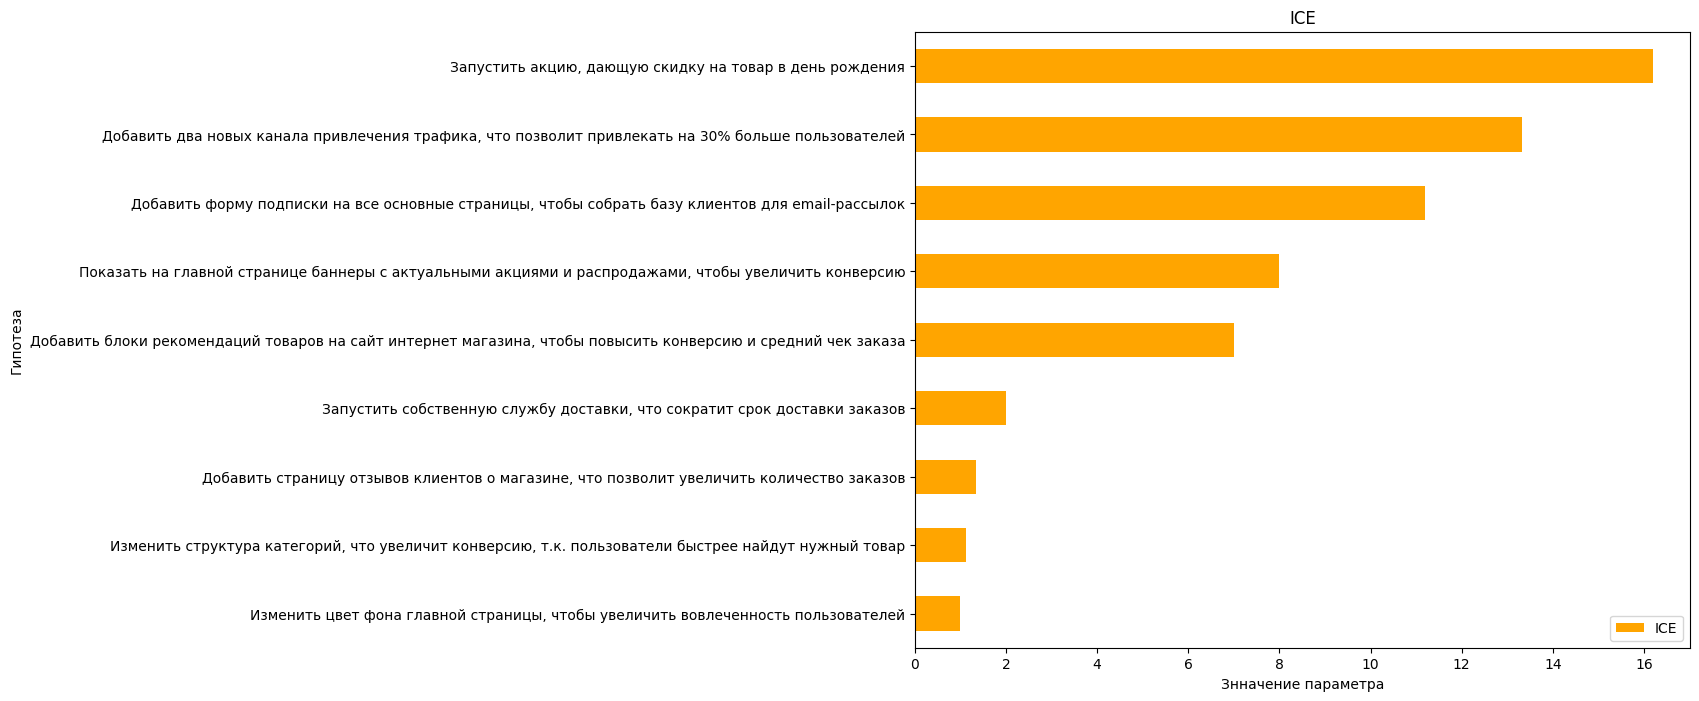

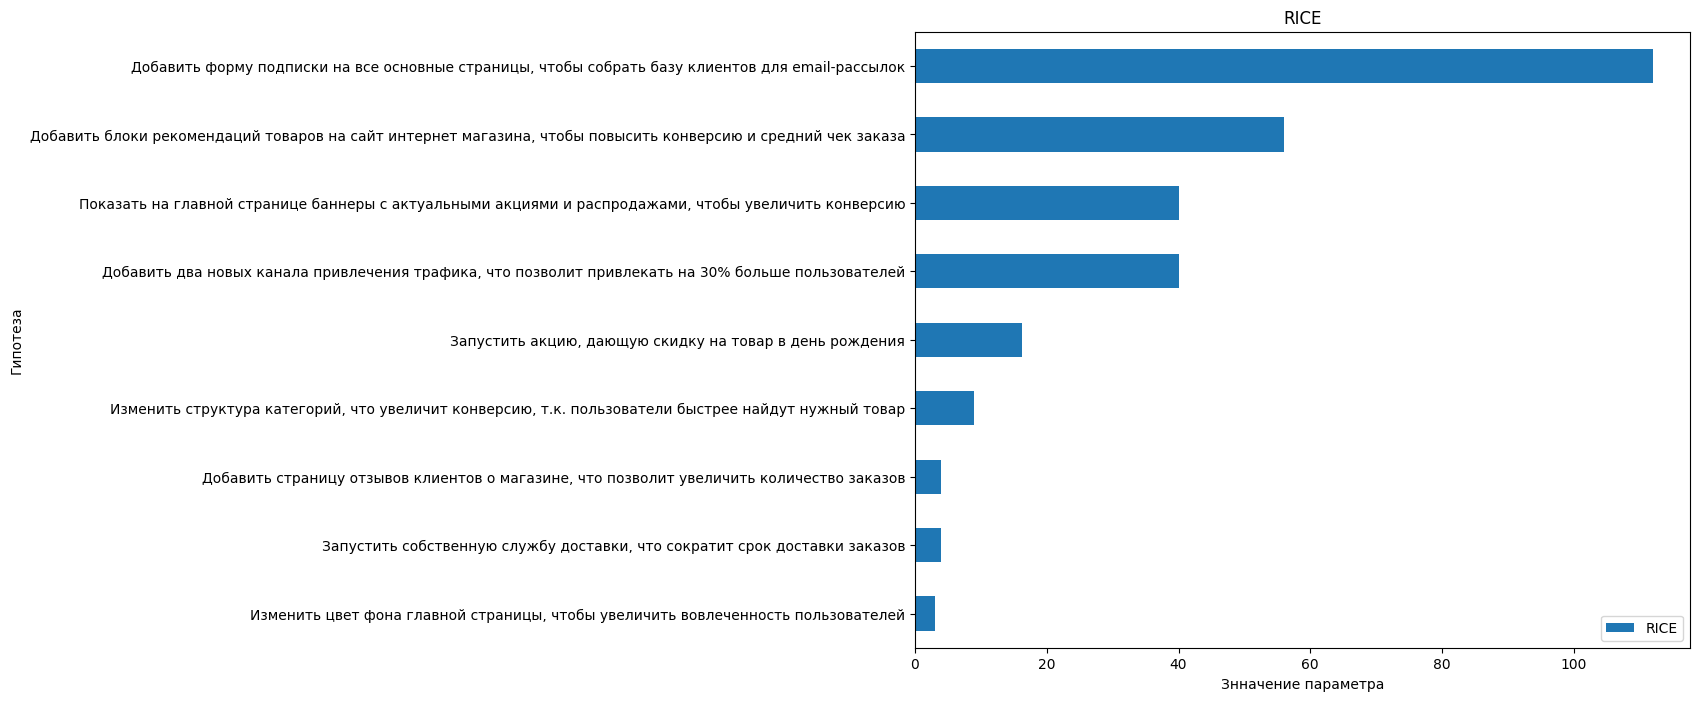

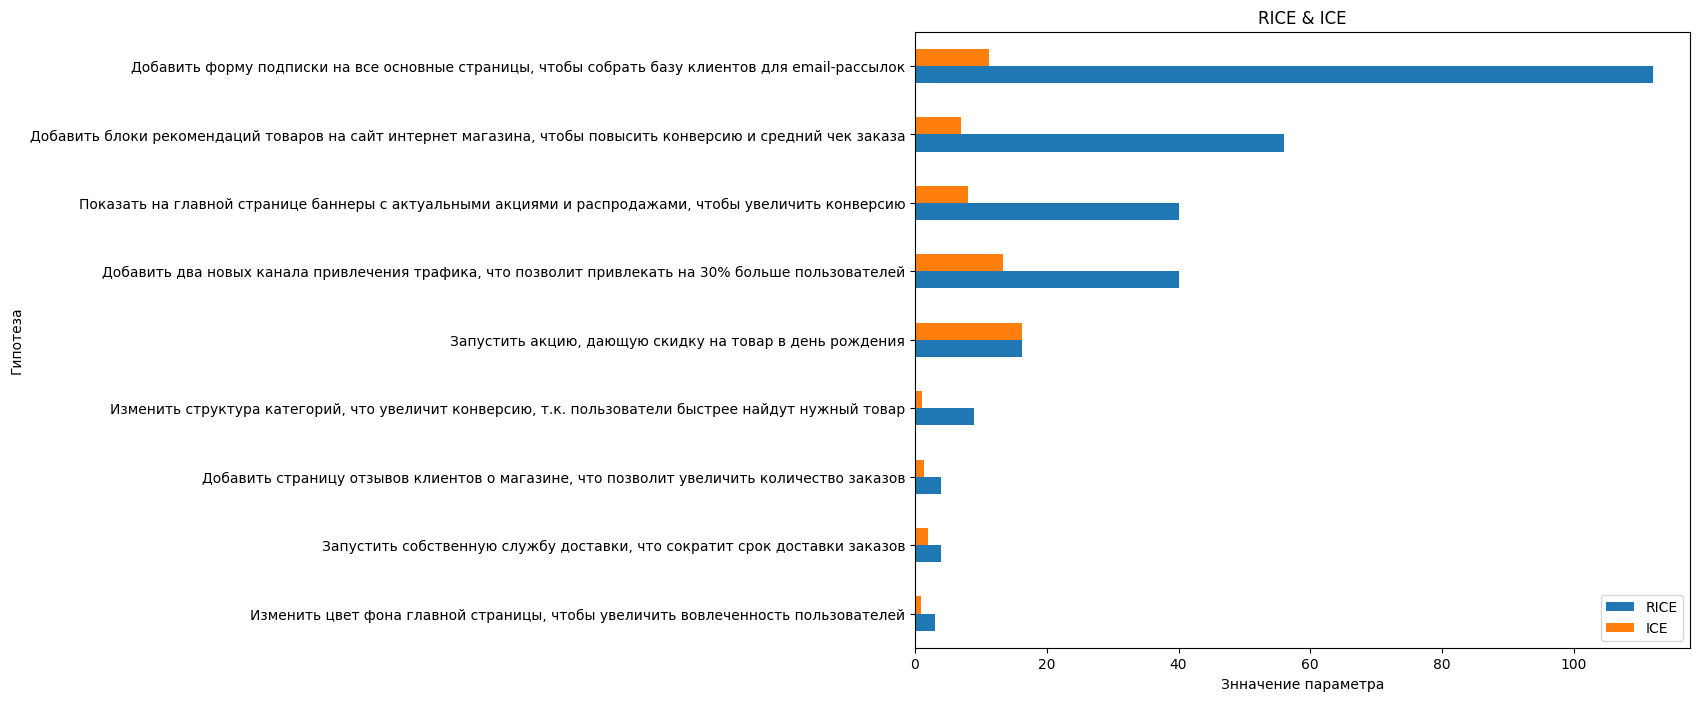

In [10]:
ice_plot = hp[['hypothesis', 'ICE']].set_index('hypothesis').sort_values(
    by= 'ICE', ascending=True).plot(kind = 'barh', figsize = (10, 8), color='orange')
plt.title('ICE')
plt.xlabel('Знначение параметра')
plt.ylabel('Гипотеза')
plt.show()

rice_plot = hp[['hypothesis', 'RICE']].set_index('hypothesis').sort_values(
    by= 'RICE', ascending=True).plot(kind = 'barh', figsize = (10, 8))
plt.title('RICE')
plt.xlabel('Знначение параметра')
plt.ylabel('Гипотеза')
plt.show()

rice_ice_plot = hp[['hypothesis', 'RICE', 'ICE']].set_index('hypothesis').sort_values(
    by= 'RICE', ascending=True).plot(kind = 'barh', figsize = (10, 8))
plt.title('RICE & ICE')
plt.xlabel('Знначение параметра')
plt.ylabel('Гипотеза')
plt.show()

В связи с тем, что в методе RICE добавляется параметр Reach(охват), приоритизация гипотез меняется.

Лидирующая гипотеза в методе ICE 'Запустить акцию, дающую скидку на товар в день рождения' при учете охвата пользователей становится не такой приоритетной(1 место в ICE против 5 места в RICE.

Гипотеза 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' является самым лучшим выбором т.к. и при методе ICE и RICE значения параметров высоки. Значит, гипотеза с более высокими охватом, влиянием и уверенностью( Reach, Impact и Confidence), а также  меньшими затратами (Efforts) имеет  более высокое значение параметра RICE, потому что ее охват высок.


Гипотезы ('Запустить собственную службу доставки, что сократит срок доставки заказов', 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар', 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей','Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов') как при применении метода ICE так и при применении метода RICE имеют самый никий приоритет, т.е. даже не смотря на учет охвата пользователей не становятся более приоритетными.

__Выводы по Части 1:__

+ Датасет hypothesis.csv проверен на дубликаты и пропуски, изучены уникальные названия  гипотез, названия столбцов приведены в соответствие.
+ Применен фреймворк ICE для приоритизации гипотез. Гипотезы отсортированы по убыванию приоритета. Наиболее приоритетные гипотезы под номерами 8, 0, 7 и 6.
+ Применен фреймворк RICE для приоритизации гипотез. Гипотезы отсортированы по убыванию приоритета. Наиболее приоритетные гипотезы под номерами 7, 2, 0 и 6.
+ Проанализировано, как изменилась приоритизация гипотез при применении RICE вместо ICE:



ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач


У метода ICE есть модификация RICE (R от англ. reach, «охват»)


Фреймворк RICE состоит из четырёх компонент:
Reach — скольких пользователей затронет изменение, которое вы хотите внести;
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
Efforts — сколько стоит протестировать эту гипотезу

В связи с тем, что в методе RICE добавляется параметр Reach(охват), приоритизация гипотез меняется.

Лидирующая гипотеза в методе ICE 'Запустить акцию, дающую скидку на товар в день рождения' при учете охвата пользователей становится не такой приоритетной(1 место в ICE против 5 места в RICE).

Гипотеза 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' является самым лучшим выбором т.к. и при методе ICE и RICE значения параметров высоки. Значит, гипотеза с более высокими охватом, влиянием и уверенностью( Reach, Impact и Confidence), а также  меньшими затратами (Efforts) имеет  более высокое значение параметра RICE, потому что ее охват высок.


Гипотезы ('Запустить собственную службу доставки, что сократит срок доставки заказов', 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар', 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей','Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов') как при применении метода ICE так и при применении метода RICE имеют самый никий приоритет, т.е. даже не смотря на учет охвата пользователей не становятся более приоритетными.

## Часть 2. Анализ A/B-теста

__Обьявим переменные orders и visitors, проведем предобработку данных__

In [11]:
orders = pd.read_csv("https://code.s3.yandex.net/datasets/orders.csv")
visitors = pd.read_csv("https://code.s3.yandex.net/datasets/visitors.csv")

In [12]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

In [15]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [16]:
orders.duplicated().sum()

0

In [17]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [18]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [20]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [21]:
visitors.duplicated().sum()

0

In [22]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

__Датасеты проверены на дубликаты и пропуски, названия столбцов приведены к змеиному регистру, в столбцах с датами изменен тип данных__

In [23]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

__Всего 2 группы для проведения А/В теста (группа А и группа В)__

In [24]:
print('Дата начала теста', visitors['date'].min())
print('Дата окончания теста', visitors['date'].max())

Дата начала теста 2019-08-01 00:00:00
Дата окончания теста 2019-08-31 00:00:00


In [25]:
orders['visitor_id'].groupby(orders['group']).count()

group
A    557
B    640
Name: visitor_id, dtype: int64

__Количество пользователей в группе А = 557 пользователей, в группе В = 640 пользователей__

__Попадают ли одни и те же пользователи в обе группы исследования?__

In [26]:
dubles = np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), 
                         orders.query('group == "B"')['visitor_id'].unique())
dubles

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830], dtype=int64)

In [27]:
print('Количество дублированных пользователей =', len(dubles))

Количество дублированных пользователей = 58


__58 пользователей попадают в обе группы исследования__

In [28]:
dubles = dubles.tolist() # список дублированных пользователей для дальнейшей отчистки датасета orders

In [29]:
orders = orders[~orders.visitor_id.isin(dubles)]

In [30]:
print('Количество дублированных пользователей =', len(np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), 
                         orders.query('group == "B"')['visitor_id'].unique()))) # проверка

Количество дублированных пользователей = 0


__Посмотрим динамику посетителей по дням по группам__

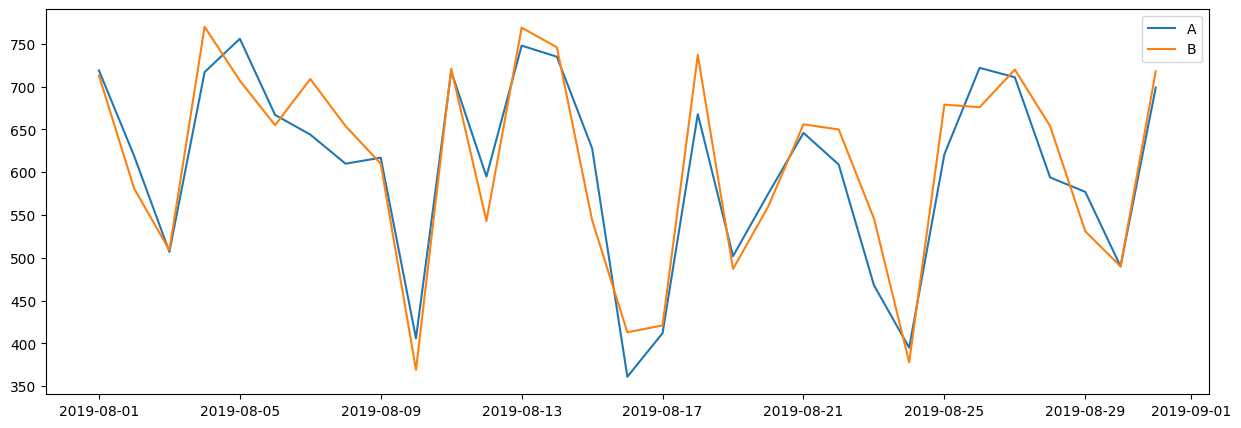

In [31]:
# датафрейм с количеством визитов по дням в группе А
visitors_a = visitors[visitors['group']=='A'][['date', 'visitors']]

# датафрейм с количеством визитов по дням в группе А
visitors_b = visitors[visitors['group']=='B'][['date','visitors']]

plt.figure(figsize=(15,5)) # задаю размер графика
# Строим график визитов группы А
plt.plot(visitors_a['date'], visitors_a['visitors'], label='A')
# Строим график визитов группы А
plt.plot(visitors_b['date'], visitors_b['visitors'], label='B')
plt.legend()
plt.show()

__Количество пользователей в обоих группах каждый день одинаковое__

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

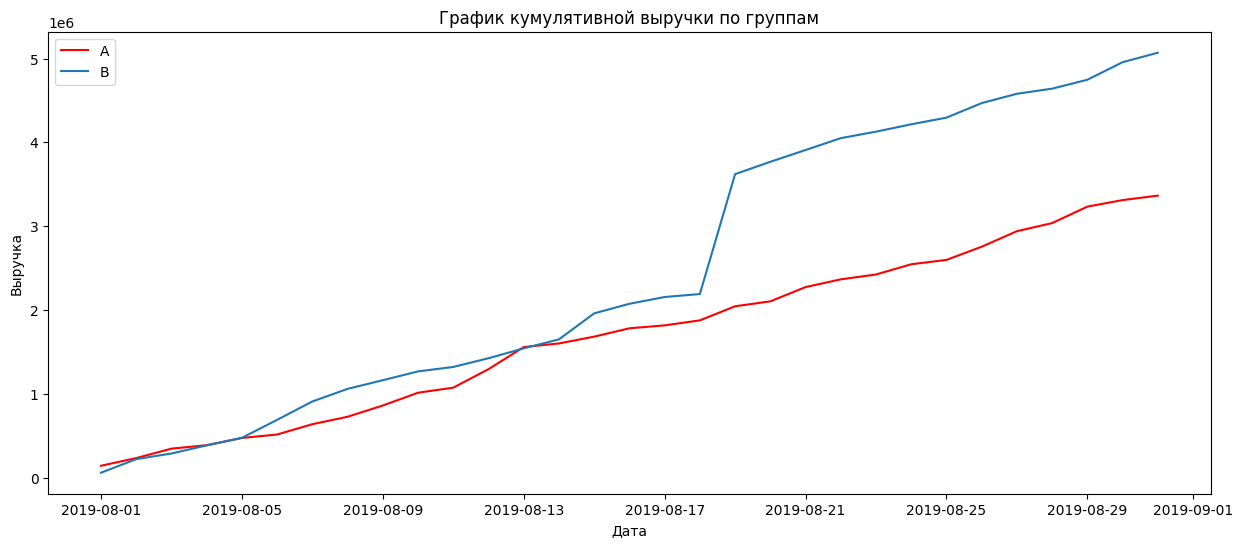

In [32]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color='red')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.legend()
plt.show()

__C начала теста и на протяжении всего периода доход рос в обеих группах, однако примерно с 18 - 19 августа наблюдается резкий скачок выручки у группы В. Возможно в данной группе есть аномальные значения выручки. Это может быть связано с крупными заказами (относительно средних заказов) или закупкой товаров массово, например для компании, в данный день__

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

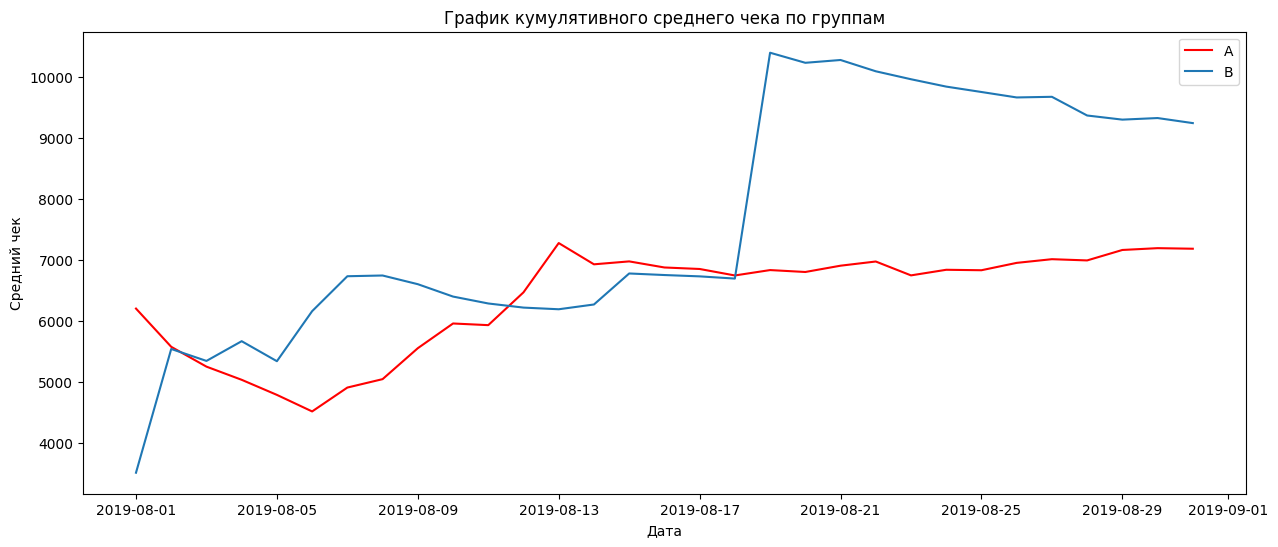

In [33]:
plt.figure(figsize=(15, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', color = 'red')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()

__Аналогично предыдущему графику в графике куммулятивного среднего чека по группам с периода 18-19 августа наблюдается резкий рост в группе В.__

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

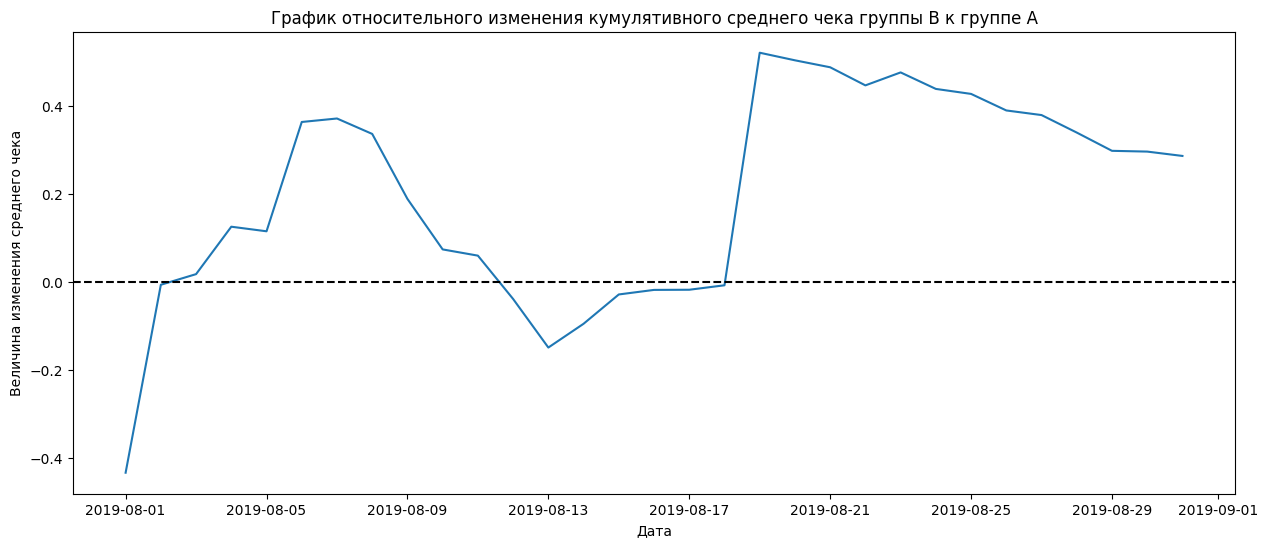

In [34]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 6))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Величина изменения среднего чека')
plt.xlabel('Дата')
plt.show()

__На графике видны резкие взлеты графика относительно оси. Можно предположить, что именно в эти дни совешены аномальные заказы__

### Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.

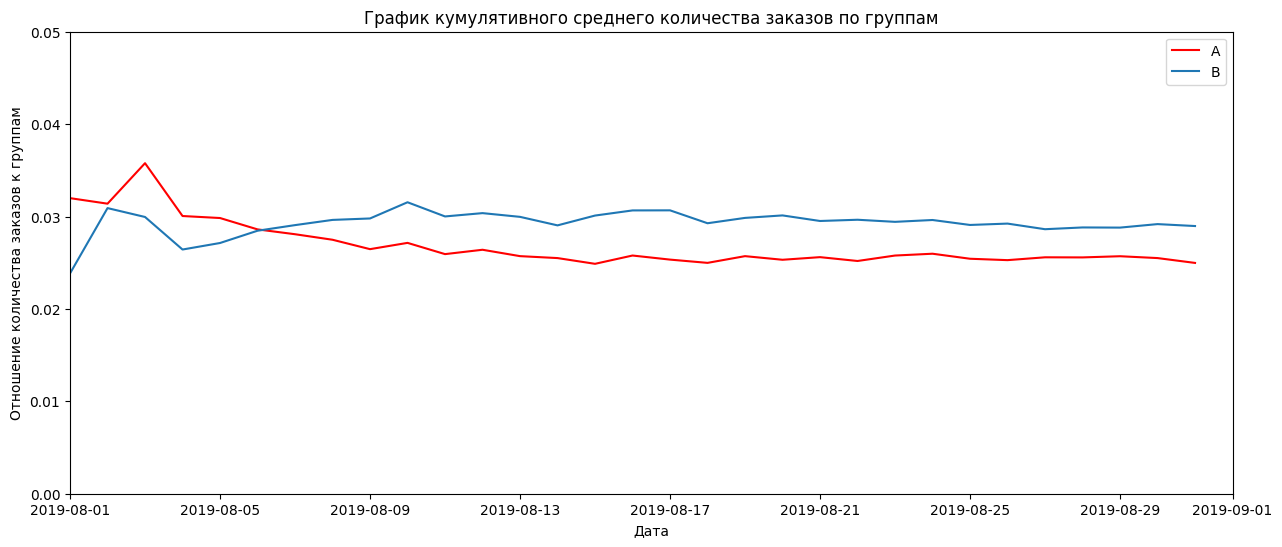

In [35]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color = 'red')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов по группам')
plt.ylabel('Отношение количества заказов к группам')
plt.xlabel('Дата')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])

plt.show()

__Куммулятивное среднее количество заказов в группе В выше чем в группе А, в начале графиков наблюдается скачок, затем графики стабилизируются  и держутся на одном уровне.__

### Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.

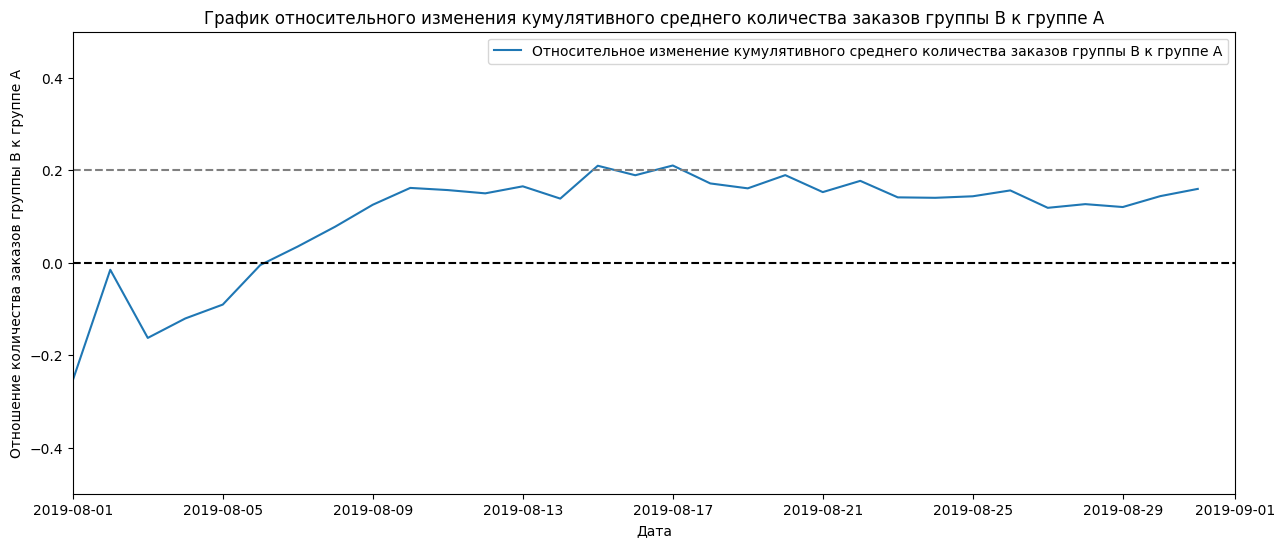

In [36]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.figure(figsize=(15, 6))
plt.plot(
    mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
    mergedCumulativeConversions['conversionA']-1, 
    label = 'Относительное изменение кумулятивного среднего количества заказов группы B к группе A'
)

plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A')
plt.ylabel('Отношение количества заказов группы B к группе A')
plt.xlabel('Дата')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5])
plt.show()

__В начале теста группа В незначительно проигрывала группе А, однако примерно с 6 августа показывает результаты лучше чем группа А.__

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

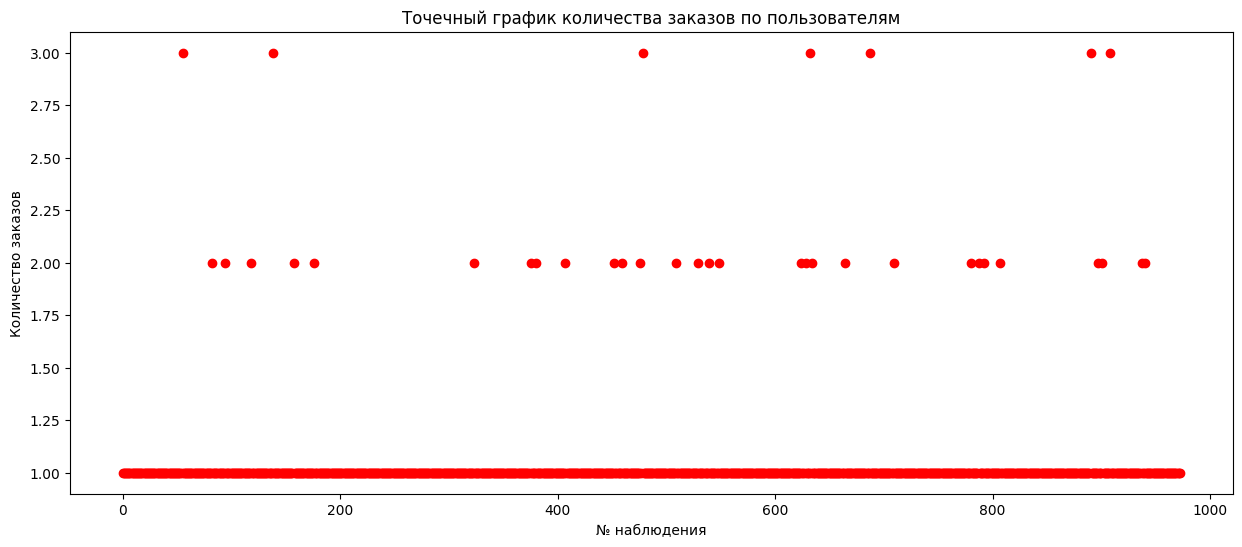

In [37]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'transaction_id']
x_values = pd.Series(range(0, len(ordersByUsers)))
# серия из чисел от 0 до количества наблюдений в ordersByUsers

plt.figure(figsize=(15, 6))
plt.scatter(x_values, ordersByUsers['transaction_id'], color = 'red') 
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('№ наблюдения')
plt.show()

__У большинства пользователей 1 заказ. Также достаточно большое количество пользователей совершили 2 заказа. Можно предположить, что пользователи с 3 и более заказами аномалии__

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [38]:
print('95 перцентиль количества заказов на пользователя =', np.percentile(ordersByUsers['transaction_id'], [95]))
print('99 перцентиль количества заказов на пользователя =', np.percentile(ordersByUsers['transaction_id'], [99]))

95 перцентиль количества заказов на пользователя = [1.]
99 перцентиль количества заказов на пользователя = [2.]


__Менее 1 % пользователей совершило 3 и более заказа. Как и менее 5% совершило более 2х заказов.Следовательно границей для определения анномальных пользователей будут пользователи более чем с 2 заказами.__

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

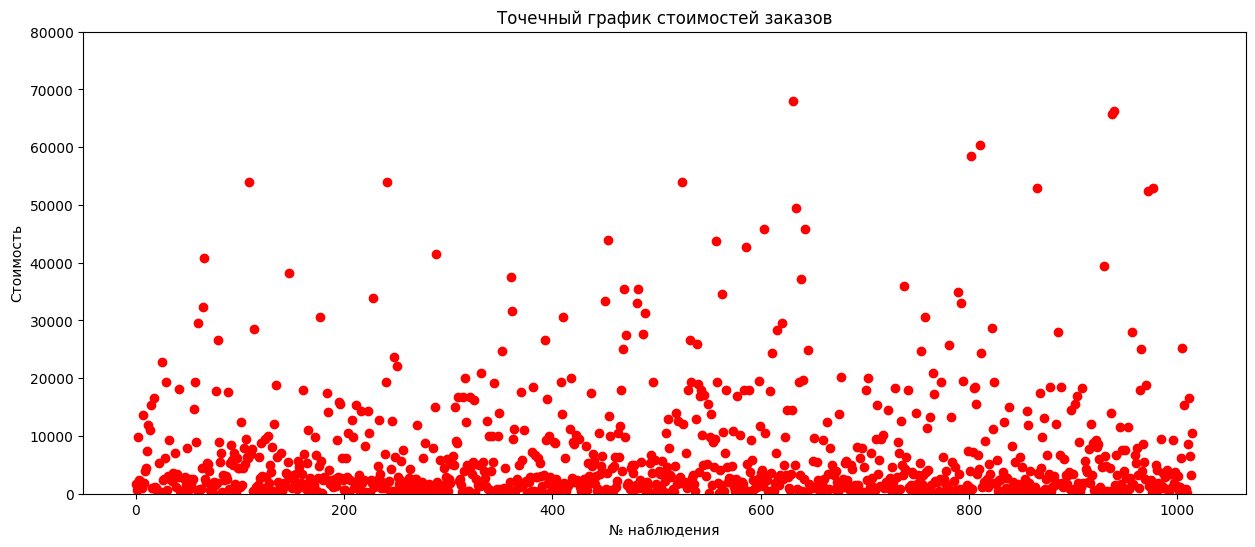

In [39]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(15, 6))
plt.scatter(x_values, orders['revenue'], color = 'red') 
plt.ylim(0, 80000)
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость')
plt.xlabel('№ наблюдения')
plt.show()

__Основная масса заказов находится в диапазоне до 20 тыс. руб. Заказов на сумму более 30 тыс. руб. не так много, т.е. можно предположить что они будут считаться аномалиями__

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [40]:
print('95 перцентиль стоимости заказов =', np.percentile(orders['revenue'], [95]))
print('99 перцентиль стоимости заказов =', np.percentile(orders['revenue'], [99]))

95 перцентиль стоимости заказов = [26785.]
99 перцентиль стоимости заказов = [53904.]


__Менее 1% совершено на сумму 53 904 тыс.руб. и менее 5% заказов совешенно на сумму более 26785 тыс. руб. Принимаем границей для определения аномальных значений 53904 тыс.руб__

### Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.

__alpha = 0.05__

__Нулевая гипотеза: различий в среднем количестве заказов между группами нет.__ 


__Альтернативная гипотеза: различия в среднем между группами есть.__

In [41]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'transaction_id']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'transaction_id']

sampleA = pd.concat([ordersByUsersA['transaction_id'],pd.Series(
    0, index=np.arange(data['visitorsPerDateA'].sum() - 
                       len(ordersByUsersA['transaction_id'])), name='transaction_id')],axis=0
                   )

sampleB = pd.concat([ordersByUsersB['transaction_id'],pd.Series(
    0, index=np.arange(data['visitorsPerDateB'].sum() - 
                       len(ordersByUsersB['transaction_id'])), name='transaction_id')],axis=0
                   )


print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Различие в среднем = ', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.011
Различие в среднем =  0.160


__Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы В равен 16%__

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

__Нулевая гипотеза: различий в среднем чеке между группами нет.__ 


__Альтернативная гипотеза: различия в среднем чеке между группами есть.__

In [42]:
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Различие в среднем = ','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.829
Различие в среднем =  0.287


__Р-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A (28,7%). Jтносительное различие среднего чека между сегментами составляет ~29%, наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.__

### Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.

__Нулевая гипотеза: различий в среднем количестве заказов между группами по отчищенным данным нет.__ 


__Альтернативная гипотеза: различия в среднем количестве заказов между группами по отчищенным данным есть.__

In [43]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction_id'] > np.quantile(ordersByUsersA['transaction_id'], 0.99)]['visitor_id'],
        ordersByUsersB[ordersByUsersB['transaction_id'] > np.quantile(ordersByUsersB['transaction_id'], 0.99)]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.quantile(orders['revenue'], 0.99)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])


1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitor_id, dtype: int64
16


__Всего 16 аномальных пользователей__

In [44]:
# подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
)

In [45]:
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Различие в среднем = ','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.007
Различие в среднем =  0.189


__p-value = 0.007 меньше 0.05. Отвергаем нулевую гипотезу.Значит различия в среднем количестве заказов между группами по отчищенным данным есть Относительный выигрыш группы В равен 18,9%__

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

__Нулевая гипотеза: различий в среднем чеке заказа между группами по отчищенным данным нет.__ 


__Альтернативная гипотеза: различия в среднем чеке заказа между группами по отчищенным данным есть.__

In [46]:
print('p-value =',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Различие в среднем = ',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.788
Различие в среднем =  -0.032


__р-value = 0,788 и > 0.05,  принимаем нулевую гипотезу, различий в среднем чеке по отчищенным данным нет. Группа В проигрывает на 3,2%__

### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

__Выбираем 1й вариант, останавливаем тест, отдаем победу группе В.__


__Несмотря на отсутствие различий в среднем чеке, количество заказов больше чем в группе А, а значит и выручка от группы В будет больше.__

__Выводы по Части 2:__

Датасеты для проведения А/В теста проверены на дубликаты и пропуски, названия столбцов приведены к змеиному регистру, в столбцах с датами изменен тип данных.


+ В графике кумулятивной выручки по группам с начала теста и на протяжении всего периода доход рос в обеих группах, однако примерно с 18 - 19 августа наблюдается резкий скачок выручки у группы В. Возможно в данной группе есть аномальные значения выручки.
+ Аналогично графику кумулятивной выручки по группам в графике куммулятивного среднего чека по группам с периода 18-19 августа наблюдается резкий рост в группе В.
+ На графике относительного изменения кумулятивного среднего чека группы B к группе A видны резкие взлеты графика относительно оси. Можно предположить, что именно в эти дни совешены аномальные заказы.
+ Куммулятивное среднее количество заказов в группе В выше чем в группе А, в начале графиков наблюдается скачок, затем графики стабилизируются  и держутся на одном уровне.
+ В графике относительного изменения кумулятивного среднего количества заказов группы B к группе A  в начале теста группа В незначительно проигрывала группе А, однако примерно с 6 августа показывает результаты лучше чем группа А.. 
+ У большинства пользователей 1 заказ. Также достаточно большое количество пользователей совершили 2 заказа. Можно предположить, что пользователи с 3 и более заказами аномалии.
+ В ходе исследования установлено что менее 1 % пользователей совершило 3 и более заказа. Как и менее 5% совершило более 2х заказов.Следовательно границей для определения анномальных пользователей будут пользователи более чем с 2 заказами.
+ Основная масса заказов находится в диапазоне до 20 тыс. руб. Заказов на сумму более 30 тыс. руб. не так много, т.е. можно предположить что они будут считаться аномалиями
+ В ходе исследования установлено что менее 1% совершено на сумму 53 904 тыс.руб. и менее 5% заказов совешенно на сумму более 26785 тыс. руб. Принимаем границей для определения аномальных значений 53904 тыс.руб
+ Подтвердились гипотезы о том, что различия в среднем чеке заказа между группами по отчищенным данным есть, различий в среднем чеке между группами нет, различия в среднем количестве заказов между группами по отчищенным данным есть , различий в среднем чеке по отчищенным данным нет.
+ Принято решение - останавливаем тест, отдаем победу группе В. Несмотря на отсутствие различий в среднем чеке, количество заказов больше чем в группе А, а значит и выручка от группы В будет больше.

## Общий вывод

__Перед нами было поставлено 2 задачи:__

+ провести приоритизацию гипотез
+ провести А/В тест

__В ходе приоритизации гипотез:__

+ Датасет hypothesis.csv проверен на дубликаты и пропуски, изучены уникальные названия  гипотез, названия столбцов приведены в соответствие.
+ Применен фреймворк ICE для приоритизации гипотез. Гипотезы отсортированы по убыванию приоритета. Наиболее приоритетные гипотезы под номерами 8, 0, 7 и 6.
+ Применен фреймворк RICE для приоритизации гипотез. Гипотезы отсортированы по убыванию приоритета. Наиболее приоритетные гипотезы под номерами 7, 2, 0 и 6.
+ Проанализировано, как изменилась приоритизация гипотез при применении RICE вместо ICE:



ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач


У метода ICE есть модификация RICE (R от англ. reach, «охват»)


Фреймворк RICE состоит из четырёх компонент:
Reach — скольких пользователей затронет изменение, которое вы хотите внести;
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
Efforts — сколько стоит протестировать эту гипотезу

В связи с тем, что в методе RICE добавляется параметр Reach(охват), приоритизация гипотез меняется.

Лидирующая гипотеза в методе ICE 'Запустить акцию, дающую скидку на товар в день рождения' при учете охвата пользователей становится не такой приоритетной(1 место в ICE против 5 места в RICE).

Гипотеза 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' является самым лучшим выбором т.к. и при методе ICE и RICE значения параметров высоки. Значит, гипотеза с более высокими охватом, влиянием и уверенностью( Reach, Impact и Confidence), а также  меньшими затратами (Efforts) имеет  более высокое значение параметра RICE, потому что ее охват высок.


Гипотезы ('Запустить собственную службу доставки, что сократит срок доставки заказов', 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар', 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей','Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов') как при применении метода ICE так и при применении метода RICE имеют самый никий приоритет, т.е. даже не смотря на учет охвата пользователей не становятся более приоритетными.



__В ходе А/В теста былы решены седующие задачи:__


Датасеты для проведения А/В теста проверены на дубликаты и пропуски, названия столбцов приведены к змеиному регистру, в столбцах с датами изменен тип данных.


1. Построен график кумулятивной выручки по группам.
+ C начала теста и на протяжении всего периода доход рос в обеих группах, однако примерно с 18 - 19 августа наблюдается резкий скачок выручки у группы В. Возможно в данной группе есть аномальные значения выручки.

2. Построен график кумулятивного среднего чека по группам.
+ Аналогично графику кумулятивной выручки по группам в графике куммулятивного среднего чека по группам с периода 18-19 августа наблюдается резкий рост в группе В.

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. 
+ На графике относительного изменения кумулятивного среднего чека группы B к группе A видны резкие взлеты графика относительно оси. Можно предположить, что именно в эти дни совешены аномальные заказы.


4. Постройте график кумулятивного среднего количества заказов по группам. 
+ Куммулятивное среднее количество заказов в группе В выше чем в группе А, в начале графиков наблюдается скачок, затем графики стабилизируются  и держутся на одном уровне.

5. Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A.
+ В начале теста группа В незначительно проигрывала группе А, однако примерно с 6 августа показывает результаты лучше чем группа А.

6. Постройте точечный график количества заказов по пользователям. 
+ У большинства пользователей 1 заказ. Также достаточно большое количество пользователей совершили 2 заказа. Можно предположить, что пользователи с 3 и более заказами аномалии.

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
+ Менее 1 % пользователей совершило 4 заказа. Как и менее 5% совершило более 2х заказов.Следовательно границей для определения анномальных пользователей будут пользователи более чем с 2 заказами.

8. Постройте точечный график стоимостей заказов. 
+ Основная масса заказов находится в диапазоне до 20 тыс. руб. Заказов на сумму более 30 тыс. руб. не так много, т.е. можно предположить что они будут считаться аномалиями.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
+ Менее 1% совершено на сумму 58 233,2 тыс.руб. и менее 5% заказов совешенно на сумму более 28 тыс. руб. Принимаем границей для определения аномальных значений 28 тыс.руб

10. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. 


__Нулевая гипотеза: различий в среднем количестве заказов между группами нет.__ 
__Альтернативная гипотеза: различия в среднем между группами есть__
+ Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы В равен 16%

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.


__Нулевая гипотеза: различий в среднем чеке между группами нет.__ 
__Альтернативная гипотеза: различия в среднем чеке между группами есть.__
+ Р-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A (28,7%). Jтносительное различие среднего чека между сегментами составляет ~29%, наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

12. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным.


__Нулевая гипотеза: различий в среднем количестве заказов между группами по отчищенным данным нет.__ 
__Альтернативная гипотеза: различия в среднем количестве заказов между группами по отчищенным данным есть.__
+ Всего выявлено 16 аномальных пользователя
+ p-value = 0.007 меньше 0.05. Отвергаем нулевую гипотезу.Значит различия в среднем количестве заказов между группами по отчищенным данным есть Относительный выигрыш группы В равен 18,9%

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 


__Нулевая гипотеза: различий в среднем чеке заказа между группами по отчищенным данным нет.__ 
__Альтернативная гипотеза: различия в среднем чеке заказа между группами по отчищенным данным есть.__
+ р-value = 0,788 и > 0.05,  принимаем нулевую гипотезу, различий в среднем чеке по отчищенным данным нет. Группа В проигрывает на 3,2%


14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.
+ Выбираем 1й вариант, останавливаем тест, отдаем победу группе В. Несмотря на отсутствие различий в среднем чеке, количество заказов больше чем в группе А, а значит и выручка от группы В будет больше.

